

**Importing all the required libraries**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import zipfile
from statsmodels.tsa.seasonal import seasonal_decompose

2024-07-05 20:10:40.117292: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 20:10:40.119948: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 20:10:40.128732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 20:10:40.145777: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 20:10:40.145800: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 20:10:40.157150: I tensorflow/core/platform/cpu_feature_guard.cc:

In [ ]:
!unzip /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [2]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Demand')
    plt.plot(predicted, color='green',label='Predicted Demand')
    plt.title('Demand Prediction')
    plt.xlabel('Time')
    plt.ylabel('Prediction')
    plt.legend()
    plt.show()

# Calculation of Root Mean Squared-Error

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
df=pd.read_csv('/workspaces/codespaces-jupyter/data/continuous dataset.csv',index_col=[0],parse_dates=[0])

In [5]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


In [6]:
df_refined=df['nat_demand'].resample('D').mean()

In [7]:
df_refined[:'2018']

datetime
2015-01-03    1069.266587
2015-01-04    1008.123596
2015-01-05    1146.682925
2015-01-06    1143.394429
2015-01-07    1144.098817
                 ...     
2018-12-27    1252.963496
2018-12-28    1265.321875
2018-12-29    1176.583363
2018-12-30    1123.209933
2018-12-31    1142.083350
Freq: D, Name: nat_demand, Length: 1459, dtype: float64

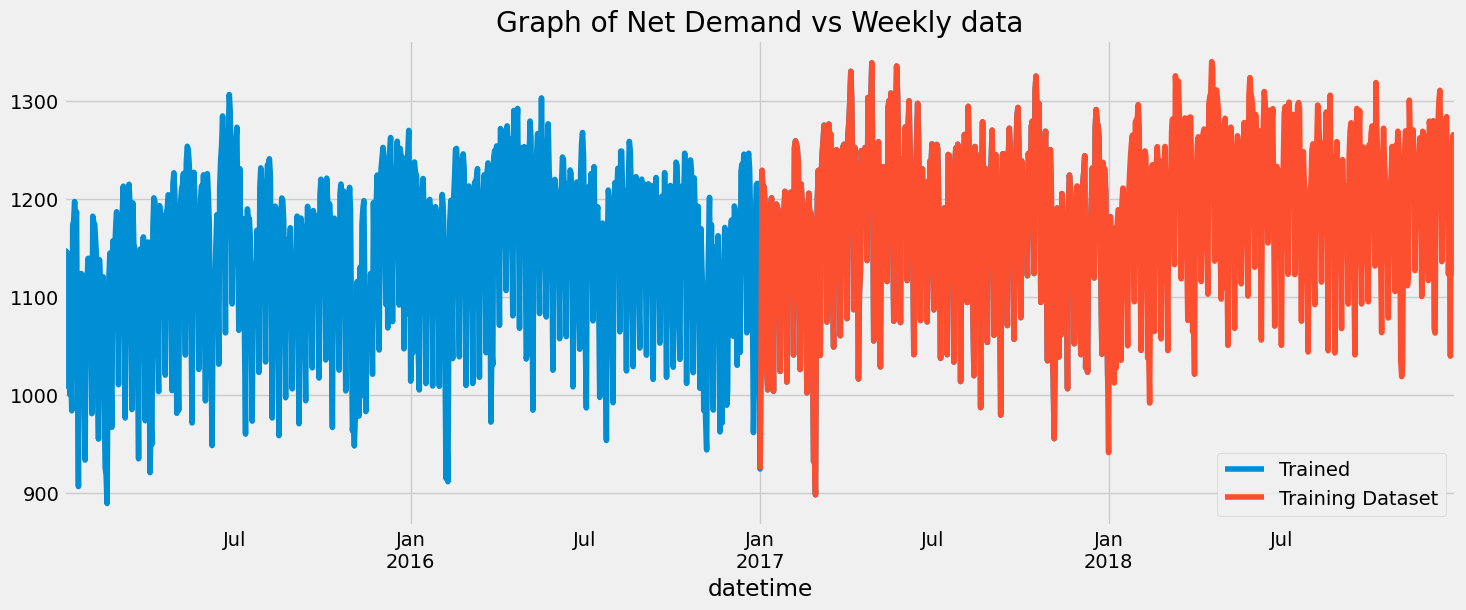

In [8]:
df_refined[:'2017'].plot(figsize=(16,6),legend=True)
df_refined['2017':'2018'].plot(figsize=(16,6),legend=True)
plt.legend(['Trained','Training Dataset'])
plt.title('Graph of Net Demand vs Weekly data')
plt.show()

In [9]:
# Checking for missing values
training_set = df_refined['2017':'2018'].values
training_set=training_set.reshape((training_set.shape[0],1))

In [10]:
print("Training Set Shape : ",training_set.shape)

Training Set Shape :  (730, 1)


In [11]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled.shape

(730, 1)

In [13]:
X_train = []
Y_train = []
for i in range(60,730):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

**Imported Model**

In [15]:
import joblib

In [17]:
model=joblib.load('/workspaces/codespaces-jupyter/models/GRU_model')

In [18]:
EPOCHS=150

In [19]:
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=72, shuffle=False)

Epoch 1/150


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0162
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0147
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0145
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0151
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0142
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0139
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0133
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0148
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0131
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0139
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0141
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0145
Epoch 13/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0130
Epoch 14/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0134
Epoch 15/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0127
E

**Saving the updated mode**l



In [20]:
joblib.dump(model,'GRU_updated_model')

['GRU_updated_model']